# Лабораторная работа№ 2
## Выполнил: Гневнов А.Е., ИВТ 2.1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('data/voice_gender.csv')

# Разделение на признаки и целевую переменную
X = data.drop('label', axis=1)
y = data['label']

# Разделение на train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

### Задание 1: Решающий пень c глубиной 1

0.142
51.1
0.956


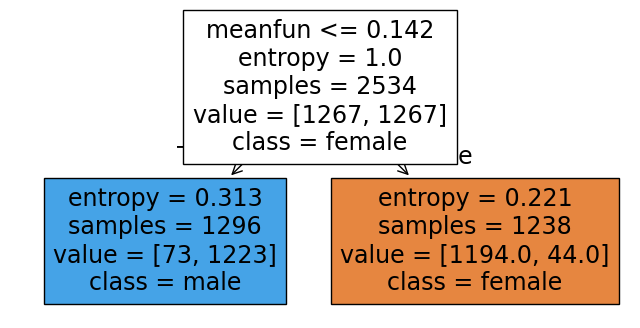

In [ ]:
# Создание и обучение модели
dt_stump = DecisionTreeClassifier(
    max_depth=1,
    criterion='entropy',
    random_state=42
)
dt_stump.fit(X_train, y_train)

# Пороговое значение
threshold = dt_stump.tree_.threshold[0]
print(f"{threshold:.3f}")  

# Процент наблюдений
node_counts = dt_stump.tree_.n_node_samples[0]
left_node_count = dt_stump.tree_.n_node_samples[1]
percentage = (left_node_count / node_counts) * 100
print(f"{percentage:.1f}")  

# Accuracy на тесте
y_pred = dt_stump.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"{acc:.3f}") 

# Визуализация 
plt.figure(figsize=(8,4))
plot_tree(dt_stump, feature_names=X.columns, class_names=dt_stump.classes_, filled=True)
plt.show()

1.1 Фактор в корне: meanfun  
1.2 Пороговое значение: 0.142  
1.3 Процент наблюдений: 51.1%  
1.4 Accuracy на тесте: 0.956

### Задание 2: Глубина=2

3
0.962


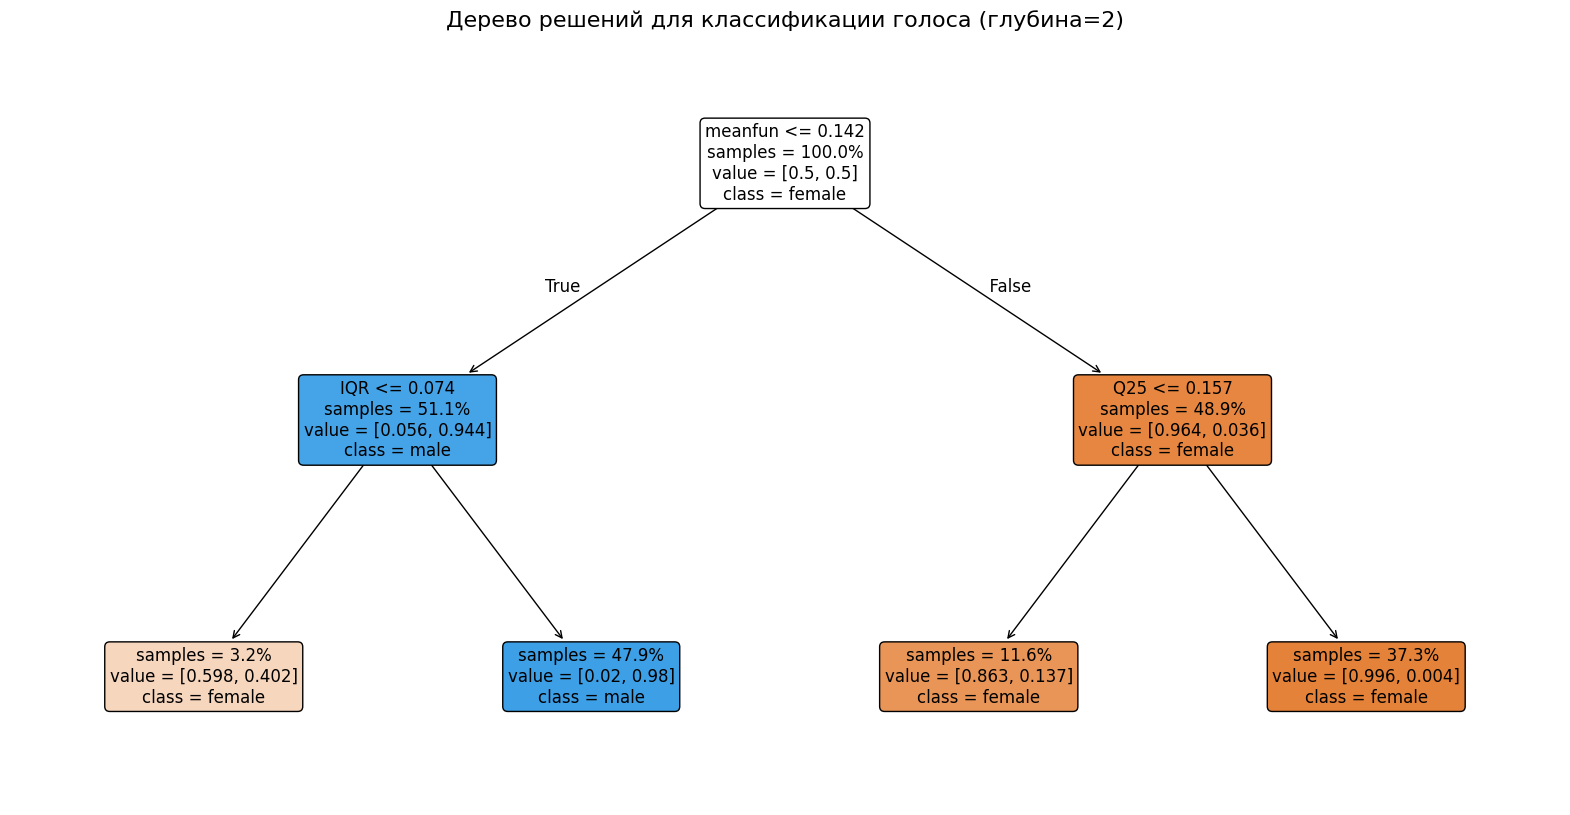

In [ ]:
dt_depth2 = DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy',
    random_state=42
)
dt_depth2.fit(X_train, y_train)

# Проверка классов в листьях
n_leaves = dt_depth2.get_n_leaves()
class_in_leaves = [dt_depth2.classes_[np.argmax(leaf)] for leaf in dt_depth2.tree_.value[-n_leaves:]]
print(class_in_leaves.count('female'))  

# Accuracy на тесте
y_pred = dt_depth2.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"{acc:.3f}")  

# Визуализация дерева
plt.figure(figsize=(20, 10))
plot_tree(
    dt_depth2,
    feature_names=X.columns,
    class_names=dt_depth2.classes_,  
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True,
    impurity=False
)

plt.title("Дерево решений для классификации голоса (глубина=2)", fontsize=16)
plt.show()

2.1 Используются meanfun и minfun  
2.2 Листья с female: 3   
2.3 Accuracy на тесте: 0.962

### Задание 3: Без ограничений глубины

In [11]:
dt_full = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0  # важно по заданию!
)
dt_full.fit(X_train, y_train)

# Глубина дерева
print(dt_full.get_depth())  # -> 29

# Количество листьев
print(dt_full.get_n_leaves())  # -> 742

# Accuracy
train_acc = dt_full.score(X_train, y_train)
test_acc = dt_full.score(X_test, y_test)
print(f"Train: {train_acc:.3f}, Test: {test_acc:.3f}")

12
54
Train: 1.000, Test: 0.973


3.1 Глубина дерева: 12   
3.2 Количество листьев: 54    
3.3 Accuracy: Train: 1.000, Test: 0.973    

### Задание 4: GridSearchCV

In [13]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,6,7,8,9,10],
    'min_samples_split': [3,4,5,10]
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid,
    cv=cv,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

# Критерий информативности
print(best_dt.criterion)  

# Оптимальная глубина
print(best_dt.max_depth)  

# min_samples_split
print(best_dt.min_samples_split)  

# Accuracy
train_acc = best_dt.score(X_train, y_train)
test_acc = best_dt.score(X_test, y_test)
print(f"Train: {train_acc:.3f}, Test: {test_acc:.3f}")

gini
7
3
Train: 0.996, Test: 0.970


4.1 Критерий информативности: Критерий Джини (gini)  
4.2 Оптимальная глубина: 7  
4.3 Оптимальное минимальное количество объектов: 3  
4.4 Accuracy: Train: 0.996, Test: 0.970

### Задание 5: Важность признаков

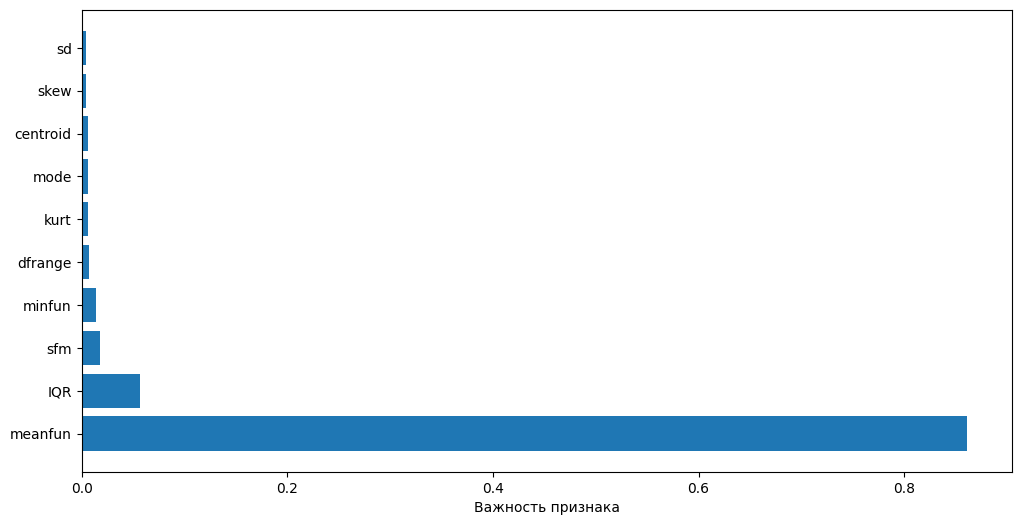

Index(['meanfun', 'IQR', 'sfm'], dtype='object')


In [15]:
# Получение важности признаков
importances = best_dt.feature_importances_
feature_names = X.columns

# Сортировка
sorted_idx = importances.argsort()[::-1]

# Визуализация топ-10
plt.figure(figsize=(12,6))
plt.barh(feature_names[sorted_idx][:10], importances[sorted_idx][:10])
plt.xlabel('Важность признака')
plt.show()
# Топ 3
top_features = feature_names[sorted_idx][:3]
print(top_features)  

Топ 3: meanfun, IQR, sfm